In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv('GEOG271 Final Project_ New Jersey Climate Data - Sheet1 (1).csv', index_col = "Year", sep=",")

In [26]:
data

,Annual Temperature (F),Yearly Precipitation (in),Annual Snowfall (in)
Year,,,
1960,51.1,49.41,48.1
1961,51.5,45.53,25.6
1962,50.2,40.01,22.4
1963,50.5,32.95,33.5
1964,51.6,37.48,30.5
...,...,...,...
2019,54.3,56.41,8.3
2020,55.5,55.13,30.8
2021,55.1,51.86,15.5


In [27]:
snow_mean = data["Annual Snowfall (in)"].mean()
temp_mean = data["Annual Temperature (F)"].mean()
precip_mean = data["Yearly Precipitation (in)"].mean()
print("Temperature Average:", temp_mean)
print("Snowfall Average:", snow_mean)
print("Precipitation Average:", precip_mean)

Temperature Average: 52.7046875
Snowfall Average: 27.807812499999997
Precipitation Average: 48.17890625


In [28]:
data.fillna(0)

,Annual Temperature (F),Yearly Precipitation (in),Annual Snowfall (in)
Year,,,
1960,51.1,49.41,48.1
1961,51.5,45.53,25.6
1962,50.2,40.01,22.4
1963,50.5,32.95,33.5
1964,51.6,37.48,30.5
...,...,...,...
2019,54.3,56.41,8.3
2020,55.5,55.13,30.8
2021,55.1,51.86,15.5


In [29]:
below_average_snowfall = data.loc[data["Annual Snowfall (in)"] <= snow_mean]
below_snow_count = 0
for i in range(0, len(below_average_snowfall)):
    below_snow_count = below_snow_count + 1
snow_ratio = below_snow_count/len(data.loc[data["Annual Snowfall (in)"] > snow_mean])
print("The ratio of below average snowfall years to above average is", snow_ratio, ": 1") # slightly more below average years

The ratio of below average snowfall years to above average is 1.206896551724138 : 1


In [30]:
above_average_precip = data.loc[data["Yearly Precipitation (in)"] >= precip_mean]
above_precip_count = 0
for i in range(0, len(above_average_precip)):
    above_precip_count = above_precip_count + 1
precip_ratio = above_precip_count/len(data["Yearly Precipitation (in)"] < precip_mean)
print("The ratio of above average precip years to below average is", round(precip_ratio, 1), ": 1") 

The ratio of above average precip years to below average is 0.5 : 1


In [31]:
above_average_temp = data.loc[data["Annual Temperature (F)"] >= temp_mean]
above_temp_count = 0
for i in range(0, len(above_average_temp)):
    above_temp_count = above_temp_count + 1
temp_ratio = above_temp_count/len(data["Annual Temperature (F)"] < temp_mean)
print("The ratio of above average temp years to below average is", temp_ratio, ": 1")

The ratio of above average temp years to below average is 0.40625 : 1


In [71]:
data.describe() # snowfall std and precip std are highest --> more spread/potential outliers?

,Annual Temperature (F),Yearly Precipitation (in),Annual Snowfall (in)
count,64.000000,64.000000,64.000000
mean,52.704687,48.178906,27.807812
std,1.516934,8.667679,14.047836
min,50.200000,26.160000,3.300000
25%,51.500000,41.907500,19.825000
50%,52.250000,48.640000,24.600000
75%,54.125000,52.585000,36.275000
max,55.900000,66.110000,58.800000


In [33]:
#covariance, skew, slope, median

In [34]:
temp_median = data["Annual Temperature (F)"].median()
snow_median = data["Annual Snowfall (in)"].median()
precip_median = data["Yearly Precipitation (in)"].median()
print("Temperature Median:", temp_median)  # median lower but graph clearl shows increase
print("Snowfall Median:", snow_median) # median less than mean --> overall below average?
print("Precipitation Median:", precip_median) # median greater than mean --> overall above average?

Temperature Median: 52.25
Snowfall Median: 24.6
Precipitation Median: 48.64


In [35]:
def calculate_covar(mean, std):
    return std/mean
temp_covar = calculate_covar(temp_mean, data["Annual Temperature (F)"].std())
snow_covar = calculate_covar(snow_mean, data["Annual Snowfall (in)"].std()) # data is most variable
precip_covar = calculate_covar(precip_mean, data["Yearly Precipitation (in)"].std())
print("Temperature Covariance:", temp_covar)
print("Snowfall Covariance:", snow_covar)
print("Precipitation Covariance:", precip_covar)

Temperature Covariance: 0.02878176651111699
Snowfall Covariance: 0.5051758588996387
Precipitation Covariance: 0.17990609911797556


In [40]:
def calculate_skew(mean, median, std):
    return (3 * (mean - median))/(std)
temp_skew = calculate_skew(temp_mean, temp_median, data["Annual Temperature (F)"].std()) # postive skew
snow_skew = calculate_skew(snow_mean, snow_median, data["Annual Snowfall (in)"].std()) # positive skew
precip_skew = calculate_skew(precip_mean, precip_median, data["Yearly Precipitation (in)"].std()) # negative skew
print("Temperature:", temp_mean, "vs", temp_median)
print("Snow:", snow_mean, "vs", snow_median)
print("Preicipitation:", precip_mean, "vs", precip_median)
print("Temperature Skew:", temp_skew)
print("Snowfall Skew:", snow_skew)
print("Precipitation Skew:", precip_skew)

Temperature: 52.7046875 vs 52.25
Snow: 27.807812499999997 vs 24.6
Preicipitation: 48.17890625 vs 48.64
Temperature Skew: 0.8992233619312082
Snowfall Skew: 0.6850477040600833
Precipitation Skew: -0.15959073204265645


In [70]:
def calculate_slope(initial_obs, initial_time, final_obs, final_time):
    return (final_obs - initial_obs) / (final_time - initial_time)

temp_slope = calculate_slope(data.at[1960, "Annual Temperature (F)"], 1960, data.at[2023, "Annual Temperature (F)"], 2023)
snow_slope = calculate_slope(data.at[1960, "Annual Snowfall (in)"], 1960, data.at[2023, "Annual Snowfall (in)"], 2023)
precip_slope = calculate_slope(data.at[1960, "Yearly Precipitation (in)"], 1960, data.at[2023, "Yearly Precipitation (in)"], 2023)
print("Temperature Slope since the 1960s:", temp_slope) # increasing?
print("Snowfall Slope since the 1960s:", snow_slope) # decreasing?
print("Precipitation Slope since the 1960s:", precip_slope) # increasing?

Temperature Slope since the 1960s: 0.0682539682539682
Snowfall Slope since the 1960s: -0.4095238095238095
Precipitation Slope since the 1960s: 0.17952380952380956


In [76]:
correlation_temp = data["Annual Temperature (F)"].corr(data["Annual Temperature (F)"])
correlation_snow = data["Annual Temperature (F)"].corr(data["Annual Snowfall (in)"])
correlation_precip = data["Annual Temperature (F)"].corr(data["Yearly Precipitation (in)"])
print("Correlation Cofficient (Temp):", correlation_temp) # strong positive linear
print("Correlation Cofficient (Snow):", correlation_snow) # weak negative linear
print("Correlation Cofficient (Precip):", correlation_precip) # weak-moderate positive linear

Correlation Cofficient (Temp): 1.0
Correlation Cofficient (Snow): -0.15654465734736853
Correlation Cofficient (Precip): 0.29203652242842765


In [41]:
temp_range = data.at[2023, "Annual Temperature (F)"] - data.at[1960, "Annual Temperature (F)"]
snow_range = data.at[2023, "Annual Snowfall (in)"] - data.at[1960, "Annual Snowfall (in)"]
precip_range = data.at[2023, "Yearly Precipitation (in)"] - data.at[1960, "Yearly Precipitation (in)"]
print("Temperature Range:", temp_range)
print("Snowfall Range:", snow_range)
print("Precipitation Range:", precip_range)

Temperature Range: 4.299999999999997
Snowfall Range: -25.8
Precipitation Range: 11.310000000000002


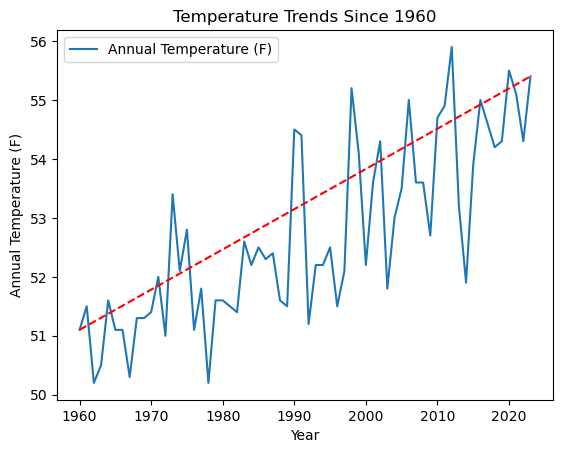

<Figure size 640x480 with 0 Axes>

In [77]:
# graphs
data.plot(y="Annual Temperature (F)")
plt.plot([data.index[0], data.index[-1]], [data.iloc[0]["Annual Temperature (F)"], data.iloc[-1]["Annual Temperature (F)"]], 'r--')
plt.xlabel('Year')
plt.ylabel('Annual Temperature (F)')
plt.title('Temperature Trends Since 1960')
plt.show()
plt.savefig("individual-temp-trend.jpg")

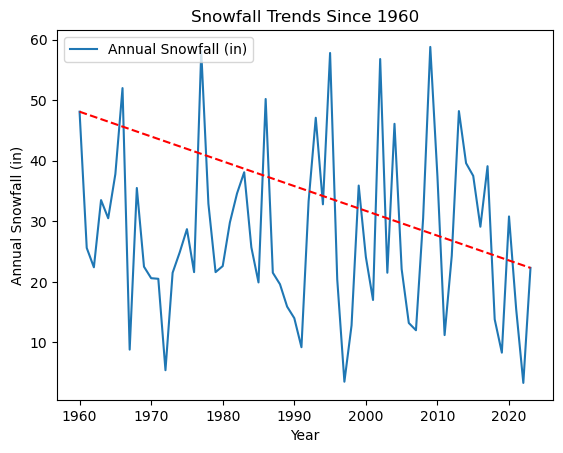

<Figure size 640x480 with 0 Axes>

In [78]:
data.plot(y = "Annual Snowfall (in)")
plt.plot([data.index[0], data.index[-1]], [data.iloc[0]["Annual Snowfall (in)"], data.iloc[-1]["Annual Snowfall (in)"]], 'r--')
plt.xlabel('Year')
plt.ylabel('Annual Snowfall (in)')
plt.title('Snowfall Trends Since 1960')
plt.show()
plt.savefig("individual-snowfall-trend.jpg")

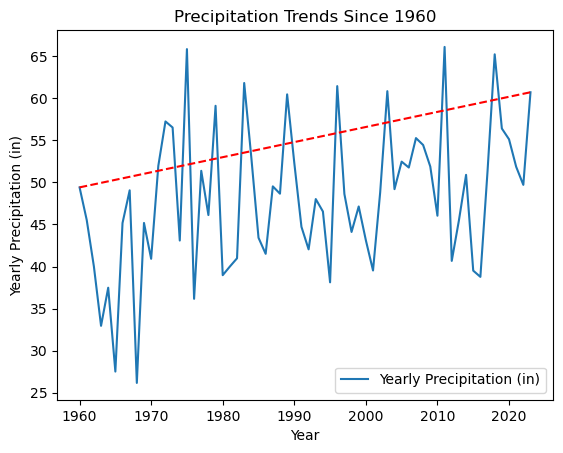

<Figure size 640x480 with 0 Axes>

In [79]:
data.plot(y = "Yearly Precipitation (in)")
plt.plot([data.index[0], data.index[-1]], [data.iloc[0]["Yearly Precipitation (in)"], data.iloc[-1]["Yearly Precipitation (in)"]], 'r--')
plt.xlabel('Year')
plt.ylabel('Yearly Precipitation (in)')
plt.title('Precipitation Trends Since 1960')
plt.show()
plt.savefig("individual-precipitation-trend.jpg")

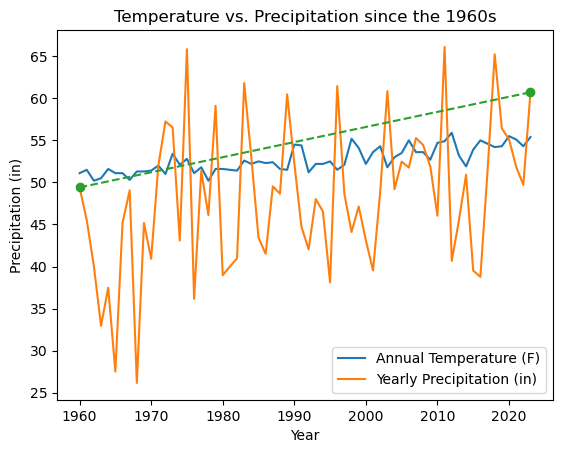

<Figure size 640x480 with 0 Axes>

In [80]:
data.plot(y=["Annual Temperature (F)", "Yearly Precipitation (in)"]
         , ylabel = "Precipitation (in)", title = "Temperature vs. Precipitation since the 1960s")
plt.plot([data.index[0], data.index[-1]], [data.iloc[0]["Yearly Precipitation (in)"], data.iloc[-1]["Yearly Precipitation (in)"]], 'o--')
plt.show()
plt.savefig("tempvsprecip-trend.jpg")

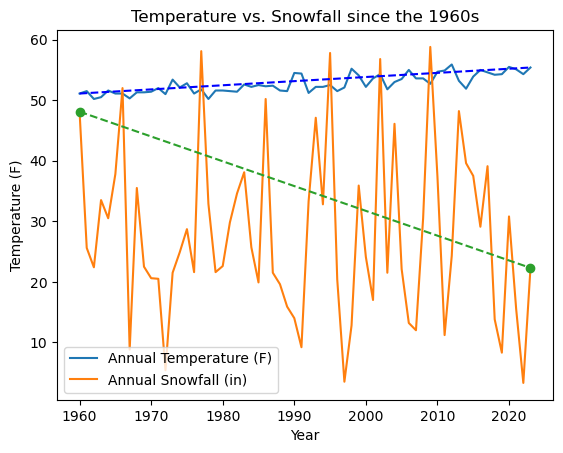

<Figure size 640x480 with 0 Axes>

In [81]:
data.plot(y=["Annual Temperature (F)", "Annual Snowfall (in)"]
         , ylabel = "Temperature (F)", title = "Temperature vs. Snowfall since the 1960s")
plt.plot([data.index[0], data.index[-1]], [data.iloc[0]["Annual Temperature (F)"], data.iloc[-1]["Annual Temperature (F)"]], 'b--')
plt.plot([data.index[0], data.index[-1]], [data.iloc[0]["Annual Snowfall (in)"], data.iloc[-1]["Annual Snowfall (in)"]], 'o--')
plt.show()
plt.savefig("tempvssnow-trend.jpg")